In [1]:
import pandas as pd
df = pd.read_excel('/Users/sophiemartusewicz/code/SophieMartusewicz/lewagonXfemtasy/raw_data/raw_data.xlsx')

In [2]:
df.head()

,Status Labels,Anonymized ID,Anonymized Story IDs,Anonymized Voice IDs,Voice Type,Genre,Language Intensity,Story Listen Timestamp,Session Breakups,Story Release Date,Kinkiness Score,Unnamed: 11,Content Types,Story Duration,Play Duration
0,Long-Term Active,3254bdad77021d79710aeba13b47321380560bd28e9294...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 18:55:29,2022-7-15-First Peak,2022-01-27 15:10:32,401,Guided,1,1203,296
1,Long-Term Active,0e1ce3011d0d542da18919f7cde7453a5451aa84bc378b...,30732,1344,female,Guided Masturbation,Intense,2022-07-16 17:18:25,2022-7-16-Early,2021-12-10 14:55:00,401,Guided,1,1584,60
2,Long-Term Active,fdab774f1be31fad01abf50351ec35a855b96a41a51b55...,33108,672,female,Guided Masturbation,Intense,2022-07-17 21:09:51,2022-7-17-Late Peak,2022-04-22 14:57:45,201,Guided,1,800,60
3,Long-Term Active,b6193336b972facd129ddaf77a718008748e373a6b579a...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 14:31:06,2022-7-15-Early,2022-01-27 15:10:32,401,Guided,1,1203,60
4,Long-Term Active,3254bdad77021d79710aeba13b47321380560bd28e9294...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 19:03:26,2022-7-15-First Peak,2022-01-27 15:10:32,401,Guided,1,1203,458


In [3]:
# Rename unnamed column to 'fantasies'
df = df.rename(columns={'Unnamed: 11': 'fantasies'})

In [4]:
df.shape

(12026, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12026 entries, 0 to 12025
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Status Labels           12026 non-null  object        
 1   Anonymized ID           12026 non-null  object        
 2   Anonymized Story IDs    12026 non-null  int64         
 3   Anonymized Voice IDs    12026 non-null  int64         
 4   Voice Type              12026 non-null  object        
 5   Genre                   12026 non-null  object        
 6   Language Intensity      12026 non-null  object        
 7   Story Listen Timestamp  12026 non-null  datetime64[ns]
 8   Session Breakups        12026 non-null  object        
 9   Story Release Date      12026 non-null  datetime64[ns]
 10  Kinkiness Score         12026 non-null  int64         
 11  fantasies               12026 non-null  object        
 12  Content Types           12026 non-null  int64 

In [6]:
df.describe()

,Anonymized Story IDs,Anonymized Voice IDs,Kinkiness Score,Content Types,Story Duration,Play Duration
count,12026.000000,12026.000000,12026.000000,12026.000000,12026.000000,12026.000000
mean,24926.610344,1524.884084,419.381507,2.585731,599.312074,292.742974
std,10801.451522,1380.309823,113.787839,0.622790,320.663756,297.423676
min,144.000000,120.000000,1.000000,1.000000,85.000000,60.000000
25%,20991.000000,336.000000,401.000000,2.000000,358.000000,60.000000
50%,30144.000000,1104.000000,501.000000,3.000000,557.000000,170.000000
75%,33168.000000,3096.000000,501.000000,3.000000,787.000000,436.000000
max,34128.000000,4320.000000,510.000000,4.000000,2240.000000,1805.000000


# Cleaning Data

## Duplicates

In [7]:
len(df)

12026

In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12021    False
12022    False
12023    False
12024    False
12025    False
Length: 12026, dtype: bool

In [9]:
df.duplicated().sum()

434

In [10]:
df[df.duplicated()]

,Status Labels,Anonymized ID,Anonymized Story IDs,Anonymized Voice IDs,Voice Type,Genre,Language Intensity,Story Listen Timestamp,Session Breakups,Story Release Date,Kinkiness Score,fantasies,Content Types,Story Duration,Play Duration
85,Long-Term Active,6142ca2b724aa3a3b2209065e97482ede5673751463831...,6828,1104,anonym,Sex Sounds,Intense,2022-07-15 14:52:44,2022-7-15-Early,2019-04-26 10:30:46,402,Quickie,2,207,207
86,Long-Term Active,6142ca2b724aa3a3b2209065e97482ede5673751463831...,6828,1104,anonym,Sex Sounds,Intense,2022-07-15 14:52:44,2022-7-15-Early,2019-04-26 10:30:46,402,Quickie,2,207,207
117,Long-Term Active,2cdabe4def61d6f60bf9aef63a691c82c769645a1139e3...,6828,1104,anonym,Sex Sounds,Intense,2022-07-15 22:24:23,2022-7-15-Late Peak,2019-04-26 10:30:46,402,Quickie,2,207,148
118,Long-Term Active,2cdabe4def61d6f60bf9aef63a691c82c769645a1139e3...,6828,1104,anonym,Sex Sounds,Intense,2022-07-15 22:24:23,2022-7-15-Late Peak,2019-04-26 10:30:46,402,Quickie,2,207,148
124,Long-Term Active,6c586b2a574b64a474856d7e5c49f118fd487f944356e9...,31224,1104,anonym,Sex Sounds,Intense,2022-07-15 11:47:27,2022-7-15-Early,2022-01-19 11:08:37,502,At home,2,617,347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11805,Short-Term Active,9e97ec1a25c35324098829157ecf7fcb243feefc5b4b64...,27024,1080,male,Phone Sex,Rough,2022-07-17 13:48:33,2022-7-17-Early,2021-06-03 15:05:30,501,At home,3,559,559
11808,Short-Term Active,4b46eb2de01deaa45ee5ff444baccf819883275c7e6c10...,32544,2808,male,Phone Sex,Rough,2022-07-17 19:31:18,2022-7-17-First Peak,2022-06-15 13:00:00,301,Group sex,3,849,60
11815,Short-Term Active,9ac617b17203443d82cf83bc754cf82ea8f2c13296cb9f...,25920,3000,male,Phone Sex,Rough,2022-07-17 22:31:31,2022-7-17-Late Peak,2020-10-29 17:00:00,201,Phone,3,459,418
11824,Short-Term Active,8404d10bb93fab248f899e1d2762b0c7ede963dae6057b...,32136,2808,male,Phone Sex,Rough,2022-07-18 11:09:56,2022-7-18-Early,2022-04-01 13:00:00,101,Doggy style,3,307,60


In [11]:
# Drop Row-duplicates
df = df.drop_duplicates()

## Missing Values

In [12]:
df.isnull().sum()

Status Labels             0
Anonymized ID             0
Anonymized Story IDs      0
Anonymized Voice IDs      0
Voice Type                0
Genre                     0
Language Intensity        0
Story Listen Timestamp    0
Session Breakups          0
Story Release Date        0
Kinkiness Score           0
fantasies                 0
Content Types             0
Story Duration            0
Play Duration             0
dtype: int64

In [13]:
df.isnull().sum() / df.shape[0] * 100

Status Labels             0.0
Anonymized ID             0.0
Anonymized Story IDs      0.0
Anonymized Voice IDs      0.0
Voice Type                0.0
Genre                     0.0
Language Intensity        0.0
Story Listen Timestamp    0.0
Session Breakups          0.0
Story Release Date        0.0
Kinkiness Score           0.0
fantasies                 0.0
Content Types             0.0
Story Duration            0.0
Play Duration             0.0
dtype: float64

# Split "Session Breakups" 

In [14]:
# Split 'Session Breakups' into single parts
df['Session Breakups_date'] = df['Session Breakups'].str[:9]
df['Session Breakups_breakup'] = df['Session Breakups'].str.slice(start=10)

In [15]:
df

,Status Labels,Anonymized ID,Anonymized Story IDs,Anonymized Voice IDs,Voice Type,Genre,Language Intensity,Story Listen Timestamp,Session Breakups,Story Release Date,Kinkiness Score,fantasies,Content Types,Story Duration,Play Duration,Session Breakups_date,Session Breakups_breakup
0,Long-Term Active,3254bdad77021d79710aeba13b47321380560bd28e9294...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 18:55:29,2022-7-15-First Peak,2022-01-27 15:10:32,401,Guided,1,1203,296,2022-7-15,First Peak
1,Long-Term Active,0e1ce3011d0d542da18919f7cde7453a5451aa84bc378b...,30732,1344,female,Guided Masturbation,Intense,2022-07-16 17:18:25,2022-7-16-Early,2021-12-10 14:55:00,401,Guided,1,1584,60,2022-7-16,Early
2,Long-Term Active,fdab774f1be31fad01abf50351ec35a855b96a41a51b55...,33108,672,female,Guided Masturbation,Intense,2022-07-17 21:09:51,2022-7-17-Late Peak,2022-04-22 14:57:45,201,Guided,1,800,60,2022-7-17,Late Peak
3,Long-Term Active,b6193336b972facd129ddaf77a718008748e373a6b579a...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 14:31:06,2022-7-15-Early,2022-01-27 15:10:32,401,Guided,1,1203,60,2022-7-15,Early
4,Long-Term Active,3254bdad77021d79710aeba13b47321380560bd28e9294...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 19:03:26,2022-7-15-First Peak,2022-01-27 15:10:32,401,Guided,1,1203,458,2022-7-15,First Peak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12021,Short-Term Active,e6b85759c4abeb56e1946bbb4c94be63a0842a256cae9f...,27192,1248,male,Phone Sex,Soft,2022-07-17 00:03:08,2022-7-16-Late Peak,2021-06-12 13:00:00,201,Phone,3,317,316,2022-7-16,Late Peak
12022,Short-Term Active,4e008ddd59934e961eab4ccf42a3c16fd0f9795ba40ea5...,27192,1248,male,Phone Sex,Soft,2022-07-18 14:56:26,2022-7-18-Early,2021-06-12 13:00:00,201,Phone,3,317,316,2022-7-18,Early
12023,Short-Term Active,a747ec6ab408692145f8435da174c10b3cd888459287c7...,22224,336,male,Phone Sex,Soft,2022-07-19 00:16:38,2022-7-18-Late Peak,2020-11-15 17:00:00,201,At home,3,490,489,2022-7-18,Late Peak
12024,Short-Term Active,0d4aa3734ecdd466e2aa6a3c5b9ca414aef1eca60e82a2...,27192,1248,male,Phone Sex,Soft,2022-07-19 13:48:53,2022-7-19-Early,2021-06-12 13:00:00,201,Phone,3,317,316,2022-7-19,Early


# Split Kinkiness Score

We are splitting the kinkscore into its 2 components for easier use: 

Kinkiness scores are on a scale of 1-510. The hundreds place shows the max kinkiness of the story’s themes, the other digits show how many tags with that kinkiness level are in the story (so a story with 10 different kink-5 tags has a score of 510)

In [16]:
def split_score(df):
    def user_kinks(value):
        if value >100:
            return str(value)[1:]
        else:
            return 0
    df['user_intensity'] = pd.to_numeric(df['Kinkiness Score'].apply(lambda x: str(x)[0]))
    df['user_kinks'] = pd.to_numeric(df['Kinkiness Score'].apply(lambda x: user_kinks(x)))
    
    return df

In [17]:
df = split_score(df)
df

,Status Labels,Anonymized ID,Anonymized Story IDs,Anonymized Voice IDs,Voice Type,Genre,Language Intensity,Story Listen Timestamp,Session Breakups,Story Release Date,Kinkiness Score,fantasies,Content Types,Story Duration,Play Duration,Session Breakups_date,Session Breakups_breakup,user_intensity,user_kinks
0,Long-Term Active,3254bdad77021d79710aeba13b47321380560bd28e9294...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 18:55:29,2022-7-15-First Peak,2022-01-27 15:10:32,401,Guided,1,1203,296,2022-7-15,First Peak,4,1
1,Long-Term Active,0e1ce3011d0d542da18919f7cde7453a5451aa84bc378b...,30732,1344,female,Guided Masturbation,Intense,2022-07-16 17:18:25,2022-7-16-Early,2021-12-10 14:55:00,401,Guided,1,1584,60,2022-7-16,Early,4,1
2,Long-Term Active,fdab774f1be31fad01abf50351ec35a855b96a41a51b55...,33108,672,female,Guided Masturbation,Intense,2022-07-17 21:09:51,2022-7-17-Late Peak,2022-04-22 14:57:45,201,Guided,1,800,60,2022-7-17,Late Peak,2,1
3,Long-Term Active,b6193336b972facd129ddaf77a718008748e373a6b579a...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 14:31:06,2022-7-15-Early,2022-01-27 15:10:32,401,Guided,1,1203,60,2022-7-15,Early,4,1
4,Long-Term Active,3254bdad77021d79710aeba13b47321380560bd28e9294...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 19:03:26,2022-7-15-First Peak,2022-01-27 15:10:32,401,Guided,1,1203,458,2022-7-15,First Peak,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12021,Short-Term Active,e6b85759c4abeb56e1946bbb4c94be63a0842a256cae9f...,27192,1248,male,Phone Sex,Soft,2022-07-17 00:03:08,2022-7-16-Late Peak,2021-06-12 13:00:00,201,Phone,3,317,316,2022-7-16,Late Peak,2,1
12022,Short-Term Active,4e008ddd59934e961eab4ccf42a3c16fd0f9795ba40ea5...,27192,1248,male,Phone Sex,Soft,2022-07-18 14:56:26,2022-7-18-Early,2021-06-12 13:00:00,201,Phone,3,317,316,2022-7-18,Early,2,1
12023,Short-Term Active,a747ec6ab408692145f8435da174c10b3cd888459287c7...,22224,336,male,Phone Sex,Soft,2022-07-19 00:16:38,2022-7-18-Late Peak,2020-11-15 17:00:00,201,At home,3,490,489,2022-7-18,Late Peak,2,1
12024,Short-Term Active,0d4aa3734ecdd466e2aa6a3c5b9ca414aef1eca60e82a2...,27192,1248,male,Phone Sex,Soft,2022-07-19 13:48:53,2022-7-19-Early,2021-06-12 13:00:00,201,Phone,3,317,316,2022-7-19,Early,2,1


# Counting Stuff 

In [18]:
user_count = df['Anonymized ID'].nunique()
user_count

2856

In [19]:
actor_count = df['Anonymized Voice IDs'].nunique()
actor_count

86

In [20]:
# website shows 1574 stories df has only 1061
story_count = df['Anonymized Story IDs'].nunique()
story_count

1061

In [21]:
fantasy_count = df['fantasies'].nunique()
fantasy_count

44

In [22]:
kink_count = df['Kinkiness Score'].nunique()
kink_count

32

# Value Counts

In [23]:
df.head()

,Status Labels,Anonymized ID,Anonymized Story IDs,Anonymized Voice IDs,Voice Type,Genre,Language Intensity,Story Listen Timestamp,Session Breakups,Story Release Date,Kinkiness Score,fantasies,Content Types,Story Duration,Play Duration,Session Breakups_date,Session Breakups_breakup,user_intensity,user_kinks
0,Long-Term Active,3254bdad77021d79710aeba13b47321380560bd28e9294...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 18:55:29,2022-7-15-First Peak,2022-01-27 15:10:32,401,Guided,1,1203,296,2022-7-15,First Peak,4,1
1,Long-Term Active,0e1ce3011d0d542da18919f7cde7453a5451aa84bc378b...,30732,1344,female,Guided Masturbation,Intense,2022-07-16 17:18:25,2022-7-16-Early,2021-12-10 14:55:00,401,Guided,1,1584,60,2022-7-16,Early,4,1
2,Long-Term Active,fdab774f1be31fad01abf50351ec35a855b96a41a51b55...,33108,672,female,Guided Masturbation,Intense,2022-07-17 21:09:51,2022-7-17-Late Peak,2022-04-22 14:57:45,201,Guided,1,800,60,2022-7-17,Late Peak,2,1
3,Long-Term Active,b6193336b972facd129ddaf77a718008748e373a6b579a...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 14:31:06,2022-7-15-Early,2022-01-27 15:10:32,401,Guided,1,1203,60,2022-7-15,Early,4,1
4,Long-Term Active,3254bdad77021d79710aeba13b47321380560bd28e9294...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 19:03:26,2022-7-15-First Peak,2022-01-27 15:10:32,401,Guided,1,1203,458,2022-7-15,First Peak,4,1


In [24]:
df['Voice Type'].value_counts()

male           6451
female         2036
anonym         1572
male_female     836
female_male     697
Name: Voice Type, dtype: int64

In [25]:
df['Genre'].value_counts()

Erotic Stories         4944
Sex Sounds             2994
Phone Sex              1014
360° Audios             823
Sounds of Lovers        738
Moaning Sounds          690
Guided Masturbation     257
Love Letters             95
Affirmations             31
Meditations               6
Name: Genre, dtype: int64

In [26]:
df['Kinkiness Score'].value_counts()

501    4162
401    1548
502    1252
402    1208
301     666
201     583
503     540
302     324
504     275
202     175
103     131
104     109
403     101
101      95
505      85
105      68
506      54
303      44
3        35
203      35
102      32
106      24
508      17
4         6
2         6
1         5
304       4
507       3
404       2
509       1
204       1
510       1
Name: Kinkiness Score, dtype: int64

1 = Soul    
2 = Sounds    
3 = Stories    
4 = Series

In [27]:
df['Content Types'].value_counts()

3    6310
2    4422
4     471
1     389
Name: Content Types, dtype: int64

In [28]:
df['Language Intensity'].value_counts()

Intense    7926
Rough      2967
Soft        699
Name: Language Intensity, dtype: int64

In [29]:
df['fantasies'].value_counts()

At home                 1991
Community               1422
Female-Male              985
BDSM                     932
With a stranger          747
Moaning                  702
Voyeurism                679
Authority                597
In Nature                476
Quickie                  371
Holiday                  348
Phone                    293
Female-Female            292
Queer                    262
Guided                   257
Sex Club                 135
Infidelity               116
Winter                   104
Couple                    88
Edging                    85
Dirty Talk                85
Soft BDSM                 84
Self-Love                 81
Summer                    64
Under the shower          61
Bi-curious                58
Submission                54
Loveletter                43
Group sex                 40
Pegging                   31
Sex Work                  27
Swinging                  21
Valentine's Day           12
Forbidden Attraction      10
Threesome     

# Voice Popularity 

In [30]:
def voice_popularity(df):
    df['voice_popularity'] = df['Anonymized Voice IDs'].apply(lambda x: df['Anonymized Voice IDs'].value_counts()[x])
    return df

In [31]:
df = voice_popularity(df)
df

,Status Labels,Anonymized ID,Anonymized Story IDs,Anonymized Voice IDs,Voice Type,Genre,Language Intensity,Story Listen Timestamp,Session Breakups,Story Release Date,Kinkiness Score,fantasies,Content Types,Story Duration,Play Duration,Session Breakups_date,Session Breakups_breakup,user_intensity,user_kinks,voice_popularity
0,Long-Term Active,3254bdad77021d79710aeba13b47321380560bd28e9294...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 18:55:29,2022-7-15-First Peak,2022-01-27 15:10:32,401,Guided,1,1203,296,2022-7-15,First Peak,4,1,280
1,Long-Term Active,0e1ce3011d0d542da18919f7cde7453a5451aa84bc378b...,30732,1344,female,Guided Masturbation,Intense,2022-07-16 17:18:25,2022-7-16-Early,2021-12-10 14:55:00,401,Guided,1,1584,60,2022-7-16,Early,4,1,223
2,Long-Term Active,fdab774f1be31fad01abf50351ec35a855b96a41a51b55...,33108,672,female,Guided Masturbation,Intense,2022-07-17 21:09:51,2022-7-17-Late Peak,2022-04-22 14:57:45,201,Guided,1,800,60,2022-7-17,Late Peak,2,1,165
3,Long-Term Active,b6193336b972facd129ddaf77a718008748e373a6b579a...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 14:31:06,2022-7-15-Early,2022-01-27 15:10:32,401,Guided,1,1203,60,2022-7-15,Early,4,1,280
4,Long-Term Active,3254bdad77021d79710aeba13b47321380560bd28e9294...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 19:03:26,2022-7-15-First Peak,2022-01-27 15:10:32,401,Guided,1,1203,458,2022-7-15,First Peak,4,1,280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12021,Short-Term Active,e6b85759c4abeb56e1946bbb4c94be63a0842a256cae9f...,27192,1248,male,Phone Sex,Soft,2022-07-17 00:03:08,2022-7-16-Late Peak,2021-06-12 13:00:00,201,Phone,3,317,316,2022-7-16,Late Peak,2,1,475
12022,Short-Term Active,4e008ddd59934e961eab4ccf42a3c16fd0f9795ba40ea5...,27192,1248,male,Phone Sex,Soft,2022-07-18 14:56:26,2022-7-18-Early,2021-06-12 13:00:00,201,Phone,3,317,316,2022-7-18,Early,2,1,475
12023,Short-Term Active,a747ec6ab408692145f8435da174c10b3cd888459287c7...,22224,336,male,Phone Sex,Soft,2022-07-19 00:16:38,2022-7-18-Late Peak,2020-11-15 17:00:00,201,At home,3,490,489,2022-7-18,Late Peak,2,1,2227
12024,Short-Term Active,0d4aa3734ecdd466e2aa6a3c5b9ca414aef1eca60e82a2...,27192,1248,male,Phone Sex,Soft,2022-07-19 13:48:53,2022-7-19-Early,2021-06-12 13:00:00,201,Phone,3,317,316,2022-7-19,Early,2,1,475


# Rough visualization of the data


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

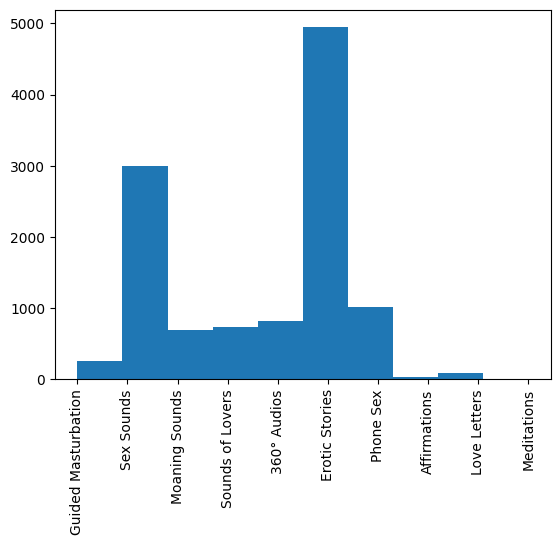

In [33]:
plt.hist(df["Genre"])
plt.xticks(rotation='vertical')

plt.show()

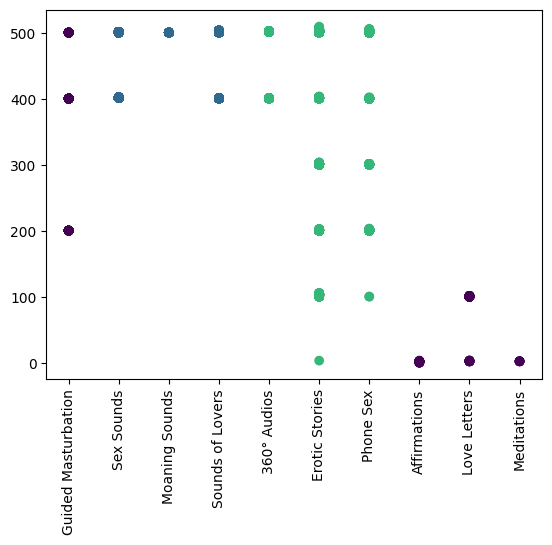

In [38]:
plt.scatter(x = df["Genre"], y = df['Kinkiness Score'], c = df["Content Types"])
plt.xticks(rotation='vertical')


plt.show()

(array([ 389.,    0.,    0., 4422.,    0.,    0., 6310.,    0.,    0.,
         471.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

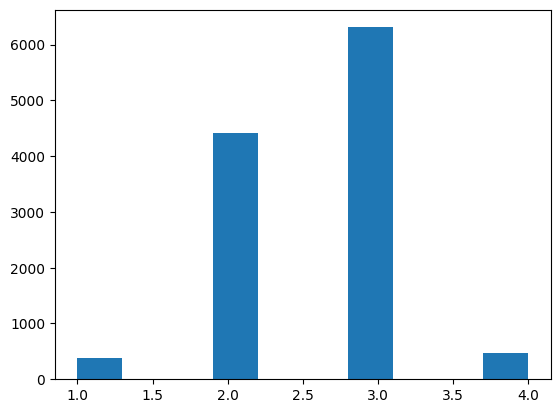

In [39]:
plt.hist(df["Content Types"])

## Distributions

<Figure size 13000x18000 with 0 Axes>

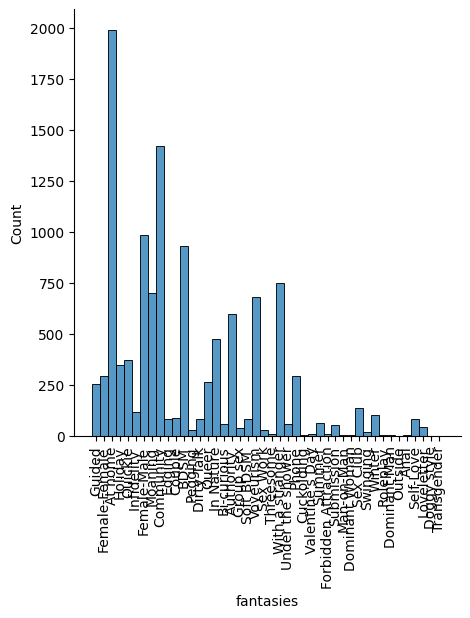

In [40]:
plt.figure(figsize=(130,180))
ax = sns.displot(df, x="fantasies", label='small')

ax.set_xticklabels(rotation=90)

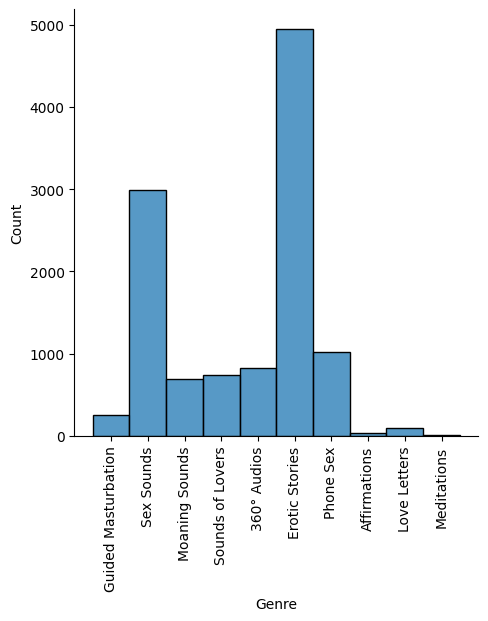

In [41]:
ax = sns.displot(df, x="Genre")
ax.set_xticklabels(rotation=90)

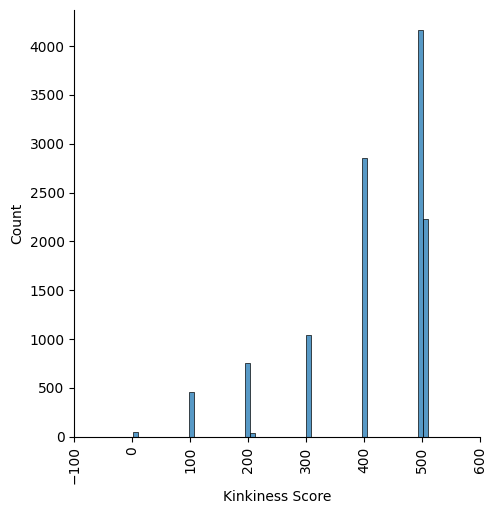

In [42]:
ax = sns.displot(df, x="Kinkiness Score")
ax.set_xticklabels(rotation=90)

<Figure size 13000x18000 with 0 Axes>

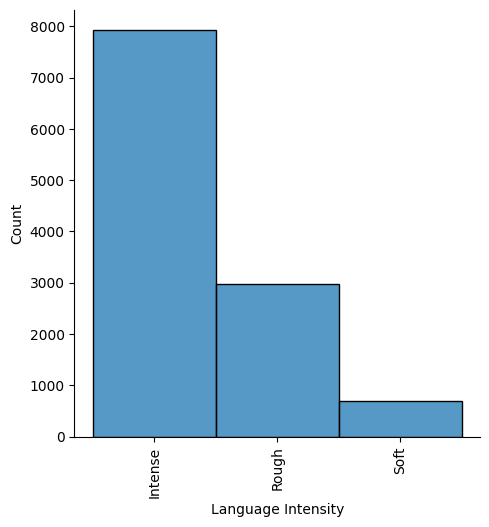

In [43]:
plt.figure(figsize=(130,180))
ax = sns.displot(df, x="Language Intensity")

ax.set_xticklabels(rotation=90)

<Figure size 13000x18000 with 0 Axes>

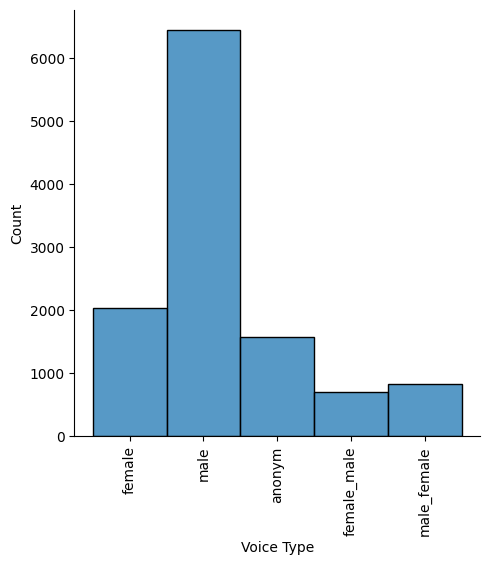

In [44]:
plt.figure(figsize=(130,180))
ax = sns.displot(df, x="Voice Type")

ax.set_xticklabels(rotation=90)

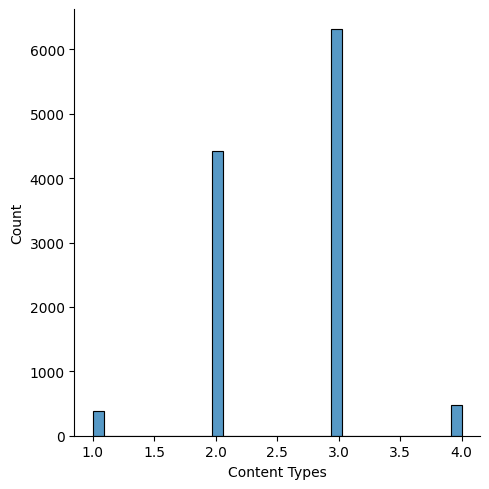

In [45]:
sns.displot(df, x="Content Types")


# Scatter Matrix 

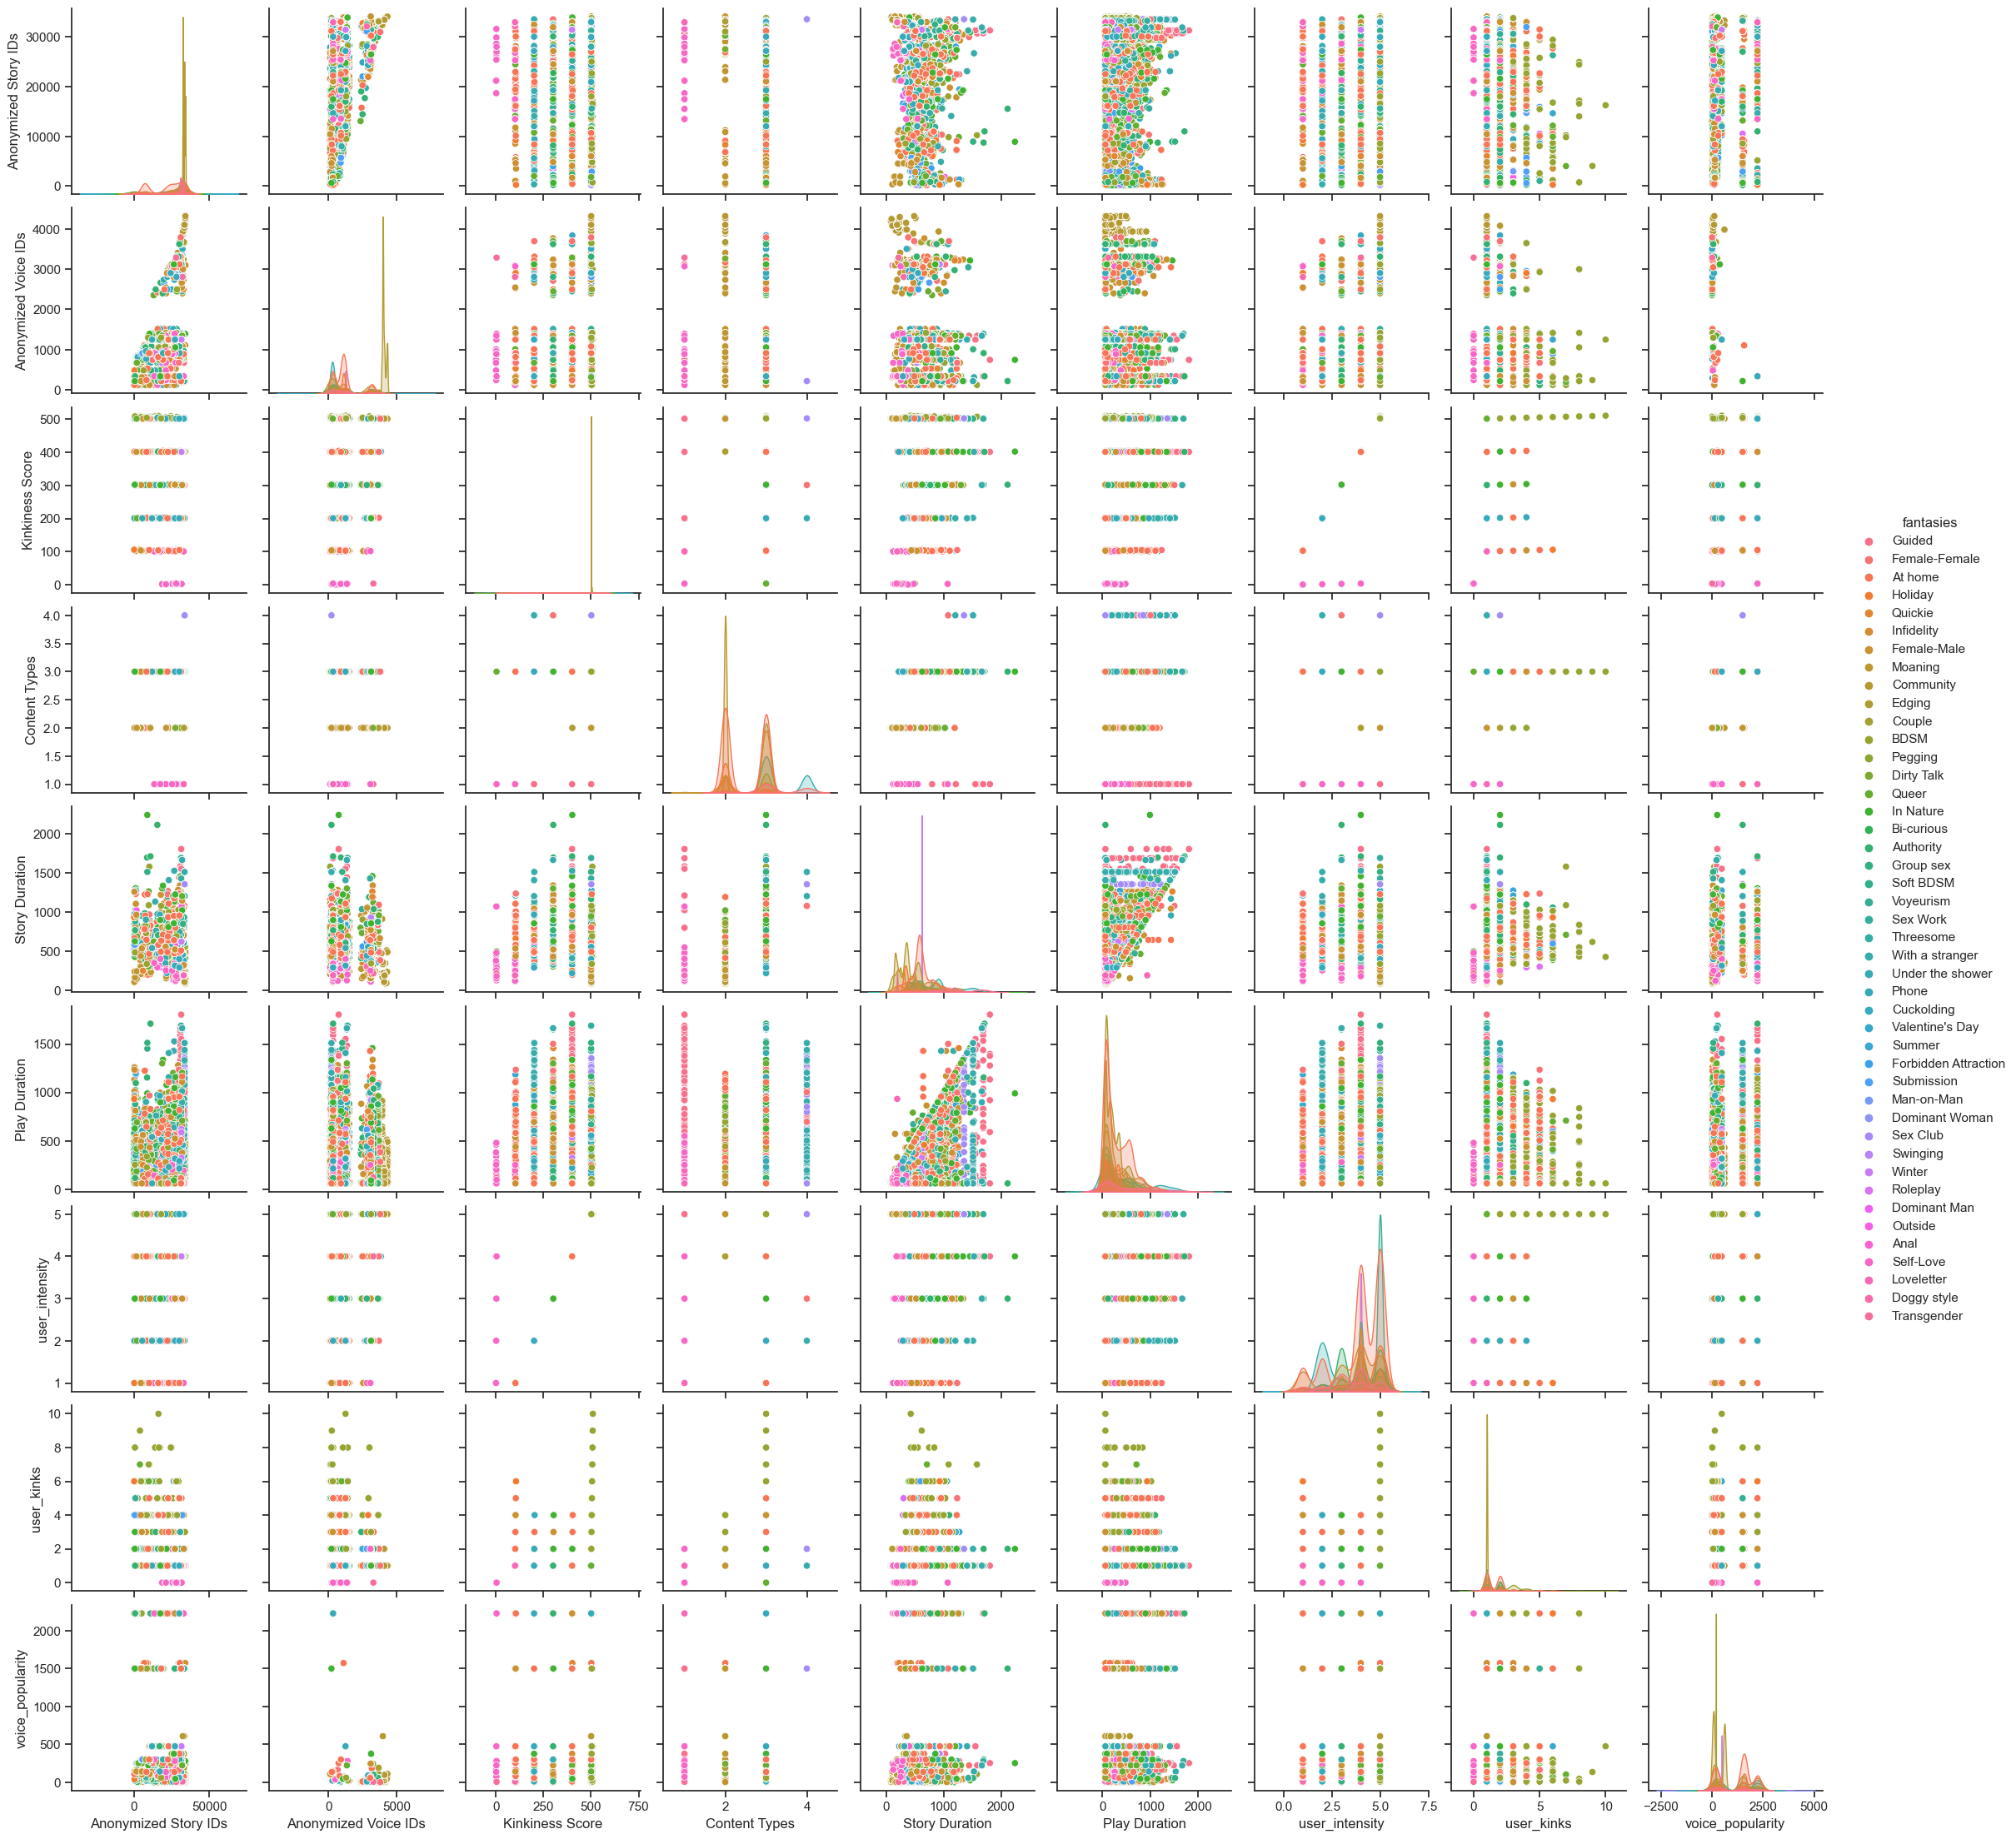

In [46]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df, hue="fantasies")